<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/10_01_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import numpy as np

In [154]:
df = pd.read_csv('dataset.csv', sep =',')
df.head()

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN


1. Quante sono le istanze contenute nel dataset? _____
Il dataset è completo (cioè per ogni
istanza tutti i valori di ogni attributo sono sempre correttamente specificati non esistono “missing values”)? _____
Il dataset è bilanciato per quanto riguarda la classe da predire? ______
(punti 1)

In [155]:
print(f'Numero istanze: {df.shape[0]}') #il numero di istanze è il numero di righe
print(f'Numero colonne: {df.shape[1]}') #numero di classi

Numero istanze: 6485
Numero colonne: 18


In [156]:
df.isnull().values.sum() #14332 missing values

np.int64(14332)

In [157]:
df['Type'].value_counts() #il dataset non è totalmente bilanciato

,count
Type,
GIA,3355
IGI Lab-Grown,1876
GIA Lab-Grown,1254


Calcolare in una nuova colonna il volume approssimato del diamante come Length * Width *
Height e verificare con un opportuno grafico se c'è una relazione tra il volume e il prezzo: i
diamanti più grandi sono quelli più costosi? (punti 2)

In [158]:
import matplotlib.pyplot as plt

In [159]:
df["Volume"] = df['Length'] * df['Width'] * df['Height']

In [160]:
#df.groupby('Volume')['Price'].mean().plot(kind='bar')

Text(0, 0.5, 'Prezzo ($)')

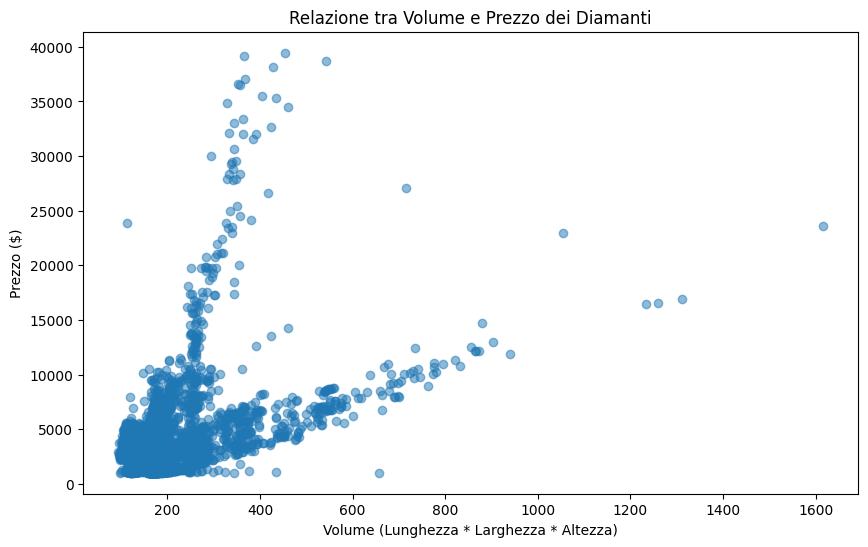

In [161]:
#altra opzione con scatter
plt.figure(figsize=(10, 6))
plt.scatter(data=df, x='Volume', y='Price', alpha=0.5)

# Personalizzazione del grafico
plt.title('Relazione tra Volume e Prezzo dei Diamanti')
plt.xlabel('Volume (Lunghezza * Larghezza * Altezza)')
plt.ylabel('Prezzo ($)')

In [162]:
#tramite il grafico possiamo osservare che tendenzialmente i diamanti più grossi sono i più costosi però che ci sono eccezioni per cui un diamante con volume più piccolo costa di più di un diamante con il volume più grosso

Considerare soltanto i record con valore non nullo di Cut e discretizzare la variabile Carat
Weight in 5 gruppi. Verificare attraverso una tabella pivot se è vero che il prezzo medio
aumenta all'aumentare della qualità del taglio e del peso in carati. (punti 3)

In [163]:
labels = ['g1','g2','g3','g4','g5']
df['Carat_Weight_mapped'] = pd.cut(df[df['Cut'].isna() == False]['Carat Weight'], bins=5, labels=labels)


In [164]:
df[df['Cut'].isna() == False].pivot_table(index='Carat_Weight_mapped', columns='Cut', values='Price', aggfunc='mean')

/tmp/ipython-input-2419286098.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df[df['Cut'].isna() == False].pivot_table(index='Carat_Weight_mapped', columns='Cut', values='Price', aggfunc='mean')


Cut,Astor,Excellent,Ideal,Very Good
Carat_Weight_mapped,,,,
g1,5348.75,2897.374172,2299.019417,3379.922481
g2,NaN,2495.000000,3803.489933,NaN
g3,NaN,NaN,5288.571429,NaN
g4,NaN,NaN,6523.947368,NaN
g5,NaN,NaN,6917.777778,NaN


Si vuole analizzare il prezzo a carato per ogni tipo di diamante: creare una nuova feature che
rappresenta il prezzo per carato (Price / Carat Weight) e visualizzare attraverso dei boxplot
come varia questo prezzo per ogni tipo (Type) di diamante (punti 4)

In [165]:
df["PPC"] = df['Price'] / df['Carat Weight']
df

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,...,Culet,Length,Width,Height,Price,Type,Fluorescence,Volume,Carat_Weight_mapped,PPC
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,...,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN,225.189035,g2,1434.782609
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,...,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN,206.754864,NaN,891.666667
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,...,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN,191.925600,NaN,899.159664
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,...,NaN,5.85,6.89,4.25,7110,GIA,Faint,171.302625,NaN,7110.000000
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,...,NaN,6.80,5.05,3.50,3050,GIA,NaN,120.190000,NaN,3019.801980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,Pear,NaN,F,VS2,1.02,1.54,62.9,63.0,Excellent,Very Good,...,NaN,8.60,5.59,3.51,3760,GIA,Medium,168.739740,NaN,3686.274510
6481,Heart,NaN,E,VVS2,1.00,1.16,58.3,59.0,Excellent,Excellent,...,NaN,6.05,6.99,4.07,4710,GIA,Strong,172.118265,NaN,4710.000000
6482,Princess,Ideal,G,VVS1,1.03,1.01,72.6,71.0,Excellent,Excellent,...,NaN,5.59,5.51,4.00,3270,GIA,NaN,123.203600,g1,3174.757282
6483,Radiant,NaN,E,VS1,1.06,1.43,67.8,62.0,Excellent,Excellent,...,NaN,7.24,5.05,3.42,1050,GIA Lab-Grown,NaN,125.042040,NaN,990.566038


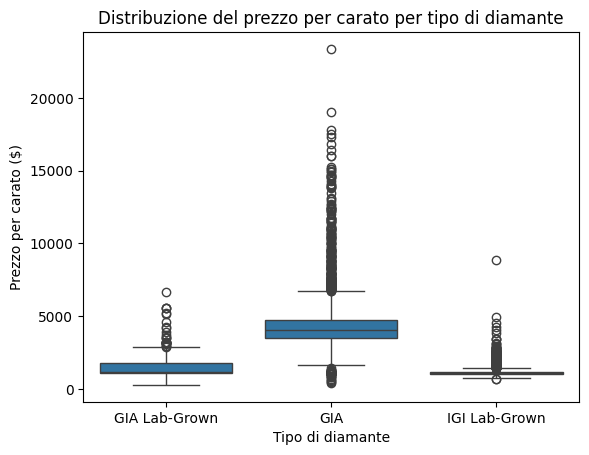

In [166]:
#per i boxplot usa seaborn, plt da problemi per i valori categorici
import seaborn as sns

sns.boxplot(x="Type", y="PPC", data=df)
plt.xlabel("Tipo di diamante")
plt.ylabel("Prezzo per carato ($)")
plt.title("Distribuzione del prezzo per carato per tipo di diamante")
plt.show()


-----------------------------------------
PARTE 2
-----------------------------------------

In [167]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

Si vuole predire la tipologia di diamante (Type). Ricaricare il dataset originale, eliminare
eventuali attributi inutili (giustificare la scelta), eliminare gli attributi con più del 50% di valori
nulli, eliminare le istanze che contengono valori nulli, trasformare opportunamente valori
categorici e dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo
dataset “train” e 1/4 nel dataset “test” preservando le proporzioni delle classi nella colonna
target.
Confrontare la predizione ottenuta sia sul dataset train sia sul dataset test dai classificatori
DecisionTree, KNeighborsClassifier e da un dummy classifier a scelta. Effettuare alcune
considerazioni sui risultati ottenuti, tenendo in considerazione i valori di F1 (con average=
“weighted”) e della confusion matrix. (punti 4)

In [168]:
df = pd.read_csv('dataset.csv', sep =',')
df

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,Pear,NaN,F,VS2,1.02,1.54,62.9,63.0,Excellent,Very Good,Thick to Very Thick,NaN,8.60,5.59,3.51,3760,GIA,Medium
6481,Heart,NaN,E,VVS2,1.00,1.16,58.3,59.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,6.05,6.99,4.07,4710,GIA,Strong
6482,Princess,Ideal,G,VVS1,1.03,1.01,72.6,71.0,Excellent,Excellent,Medium to Slightly Thick,NaN,5.59,5.51,4.00,3270,GIA,NaN
6483,Radiant,NaN,E,VS1,1.06,1.43,67.8,62.0,Excellent,Excellent,Slightly Thick to Thick,NaN,7.24,5.05,3.42,1050,GIA Lab-Grown,NaN


In [169]:
dfn = df.isnull()
for cols in dfn.columns:
  if (dfn[cols] == True).sum() > (dfn.shape[0] / 2):
    df.drop(cols, axis = 1, inplace = True)

In [170]:
df

,Shape,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Length,Width,Height,Price,Type
0,Cushion Modified,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,7.09,6.95,4.57,2640,GIA Lab-Grown
1,Pear,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,9.64,5.86,3.66,1070,GIA Lab-Grown
2,Oval,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,8.44,6.00,3.79,1070,GIA Lab-Grown
3,Heart,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,5.85,6.89,4.25,7110,GIA
4,Radiant,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,6.80,5.05,3.50,3050,GIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,Pear,F,VS2,1.02,1.54,62.9,63.0,Excellent,Very Good,Thick to Very Thick,8.60,5.59,3.51,3760,GIA
6481,Heart,E,VVS2,1.00,1.16,58.3,59.0,Excellent,Excellent,Slightly Thick to Very Thick,6.05,6.99,4.07,4710,GIA
6482,Princess,G,VVS1,1.03,1.01,72.6,71.0,Excellent,Excellent,Medium to Slightly Thick,5.59,5.51,4.00,3270,GIA
6483,Radiant,E,VS1,1.06,1.43,67.8,62.0,Excellent,Excellent,Slightly Thick to Thick,7.24,5.05,3.42,1050,GIA Lab-Grown


In [171]:
df.dropna(inplace=True)

In [172]:
le = LabelEncoder()
for column in df:
  if df[column].dtype == object:
    df[column] = le.fit_transform(df[column])
X_train, X_test, y_train, y_test = train_test_split(df.drop('Type', axis=1), df['Type'], test_size=0.25, random_state=42, stratify=df['Type'])

In [173]:
models = {'DecisionTree': DecisionTreeClassifier(),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'DummyClassifier': DummyClassifier()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"F1 on train {f1_score(trainlabels,trainpred, average = 'weighted')}")
  print(f"F1 on test {f1_score(testlabels,testpred, average = 'weighted')}")
  print(f"confusion matrix on train \n {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test \n {confusion_matrix(testlabels,testpred)}")


for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)


 ===== DecisionTree =====
F1 on train 1.0
F1 on test 0.9290176402999594
confusion matrix on train 
 [[2509    0    0]
 [   0  935    0]
 [   0    0 1403]]
confusion matrix on test 
 [[831   5   1]
 [  5 260  47]
 [  1  56 410]]
 ===== KNeighborsClassifier =====
F1 on train 0.853045982377374
F1 on test 0.803437114827724
confusion matrix on train 
 [[2448   40   21]
 [ 225  536  174]
 [ 118  100 1185]]
confusion matrix on test 
 [[807  23   7]
 [ 90 141  81]
 [ 48  50 369]]
 ===== DummyClassifier =====
F1 on train 0.3531153346789126
F1 on test 0.3534614111635379
confusion matrix on train 
 [[2509    0    0]
 [ 935    0    0]
 [1403    0    0]]
confusion matrix on test 
 [[837   0   0]
 [312   0   0]
 [467   0   0]]


In [174]:
#possiamo osservare che il decision tree ottiene degli ottimi risultati sia su train che su test, l'f1 score del 100% però potrebbe indicare un overfitting
#il kn neighbour ottiene dei buoni risultati sia su train e test, peggiori del decision tree però plausibili, in questo caso non si osserva overfitting
#il dummy classifier assegna tutto alla prima classe siccome è quella con + sample e di conseguenza ottiene dei pessimi risultati

Confrontare i valori di F1 ottenuti nel punto precedente con quelli che si ottengono con una 10 Fold cross validation. (punti 1)

In [175]:
# cross_val_score ritorna array di score su ciascun fold
f1_scores_dt = cross_val_score( DecisionTreeClassifier() ,df.drop('Type', axis=1), df['Type'], cv=10, scoring='f1_weighted')
print("decision tree  f1 10-fold:", f1_scores_dt)
print("decision tree  mean f1 10-fold:", np.mean(f1_scores_dt))


f1_scores_kn = cross_val_score(KNeighborsClassifier(), df.drop('Type', axis=1), df['Type'], cv=10, scoring='f1_weighted')
print("kn f1 10-fold:", f1_scores_kn)
print("kn f1 mean 10-fold", np.mean(f1_scores_kn))

f1_score_dc = cross_val_score(DummyClassifier(), df.drop('Type', axis=1), df['Type'], cv=10, scoring='f1_weighted')
print("dummy classifier f1 10-fold:", f1_score_dc)
print("dummy classifier mean f1 10-fold", np.mean(f1_score_dc))

#si può osservare che i valori che si ottengono solo leggermente migliori di quelli del punto precedente ma rimangono piuttosto confrontabili


decision tree  f1 10-fold: [0.93011732 0.93398391 0.92672108 0.92230257 0.8988038  0.93993006
 0.94315009 0.93505911 0.94107744 0.92720058]
decision tree  mean f1 10-fold: 0.9298345961489142
kn f1 10-fold: [0.80262473 0.82418215 0.82303051 0.80728535 0.77667361 0.8199103
 0.82726707 0.79819494 0.80637761 0.82241041]
kn f1 mean 10-fold 0.8107956689855745
dummy classifier f1 10-fold: [0.35326763 0.35326763 0.35326763 0.35242307 0.35242307 0.35242307
 0.35242307 0.35417515 0.35417515 0.35417515]
dummy classifier mean f1 10-fold 0.35320206242655927


Attraverso la tecnica Permutation Feature Importance (PFI) e considerando il classificatore KNeighborsClassifier, analizzare la feature importance del dataset utilizzato al punto 1. Applicare 5 permutazioni per ogni feature. Quali risultano essere le 2 feature più importanti?
(punti 4)

In [176]:
df

,Shape,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Length,Width,Height,Price,Type
0,1,2,5,1.84,1.02,65.8,59.0,0,2,7,7.09,6.95,4.57,2640,1
1,6,1,2,1.20,1.65,62.5,58.0,2,2,7,9.64,5.86,3.66,1070,1
2,5,1,2,1.19,1.41,63.1,63.0,2,2,7,8.44,6.00,3.79,1070,1
3,3,0,1,1.00,1.18,61.7,58.0,0,0,13,5.85,6.89,4.25,7110,0
4,8,4,2,1.01,1.35,69.4,66.0,0,2,14,6.80,5.05,3.50,3050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,6,2,3,1.02,1.54,62.9,63.0,0,2,16,8.60,5.59,3.51,3760,0
6481,3,1,5,1.00,1.16,58.3,59.0,0,0,13,6.05,6.99,4.07,4710,0
6482,7,3,4,1.03,1.01,72.6,71.0,0,0,6,5.59,5.51,4.00,3270,0
6483,8,1,2,1.06,1.43,67.8,62.0,0,0,12,7.24,5.05,3.42,1050,1


In [177]:
Y = df["Type"]
X = df.drop(["Type"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)


model = KNeighborsClassifier()
model.fit(X_train, y_train)

#per ogni feature del dataset di test faccio una permutazinoe dei valori e vedo come variano le performacne se chiamo le predizioni del modello
#allenato precedentemente sul dataset con la feature permutata. questa permutazione la faccio 5 volte
feature_names = X_test.columns
n_permutations = 5
f1_scores = [] #lista in cui inserisco i risultati degli f1 score
importances = {} #inserisco qua la differenza tra il valore originali degli f1 e la media dei valori permutati

for feature in feature_names:
  #per ogni feature costruisco una lista di score siccome vado a calcolare 5 volte l'f1 score per ogni feature
    feature_scores = []
    f1_origin = f1_score(y_test, model.predict(X_test),average='weighted') #calcolo l'f1 score senza aver fatto permutazioni alla feature
    for _ in range(n_permutations): #faccio 5 permutazioni di una feature
        X_test_permuted = X_test.copy()
        X_test_permuted[feature] = np.random.permutation(X_test_permuted[feature]) #per ogni permutazione perumot i valori con questa funzione di np
        f1_permuted = f1_score(y_test, model.predict(X_test_permuted),average='weighted') #calcolo l'f1 score tra y_test (valori reali) e le perdizioni sulla feature permutata
        feature_scores.append(f1_permuted)
        #per ogni feature avrò 5 valori di f1 permutato
    f1_scores.append(feature_scores) #avrò quindi una matrice di n feature per 5 valori di ciascuna feautre
    importances[feature] = f1_origin - np.mean(f1_scores)


In [178]:
importance_df = (
    pd.DataFrame.from_dict(importances, orient="index", columns=["Importance"])
      .sort_values(by="Importance", ascending=False)
)

print("Ranking delle feature:")
print(importance_df)

print("\nLe 2 feature più importanti sono:")
print(importance_df.head(2))

Ranking delle feature:
                    Importance
Price                 0.035573
Girdle                0.009908
Length                0.008947
Width                 0.008128
Height                0.007542
Color                 0.005104
Table %               0.004891
Shape                 0.004381
Polish                0.004179
Symmetry              0.003960
Depth %               0.003672
Clarity               0.003623
Carat Weight          0.002637
Length/Width Ratio    0.002040

Le 2 feature più importanti sono:
        Importance
Price     0.035573
Girdle    0.009908


A partire dal dataset utilizzato al punto 1, trovare i valori migliori dei parametri weights e n_neighbors del classificatore KNeighborsClassifier. Come varia il valore di F1? (punti 2)

In [179]:
parameters = {
    'weights': ['uniform', 'distance'],
    'n_neighbors':[2,6,8,10,20]
}
#devi specificare refit quando si calcolano due metriche insieme.
gd_dt = GridSearchCV(KNeighborsClassifier(),
                     parameters,
                     scoring='f1_weighted',
                     cv=5,
                     n_jobs = 1)
gd_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [2, 6, 8, 10, 20],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [180]:
best_par = gd_dt.best_params_
best_par

{'n_neighbors': 6, 'weights': 'distance'}

In [181]:
best_score = gd_dt.best_score_
best_score

np.float64(0.8132330317463152)

In [182]:
best_model = gd_dt.best_estimator_
y_test_pred_best = best_model.predict(X_test)
y_train_pred_best = best_model.predict(X_train)
print(f"f1 on train {f1_score(y_train, y_train_pred_best,average = 'weighted')}")
print(f"f1 on test {f1_score(y_test, y_test_pred_best,average = 'weighted')}")

#si osserva che i valori del f1 score aumentano rispetto ai valori precedente raggiungendo un 100% sul train

f1 on train 1.0
f1 on test 0.8138031212131851


Creare una pipeline in cui, a partire dal dataset utilizzato al punto precedente, i valori degli attributi Length, Width, Height sono discretizzati in 5 intervalli, la variabile Price è scalata nell'intervallo 0-1 e tutti gli altri attributi sono lasciati invariati. Applicare il KNeighborsClassifier
con i valori migliori dei parametri analizzati nel punto precedente e confrontare i risultati.
(punti 3)

In [183]:
col_tran = ColumnTransformer(
    transformers=[
        ('discr', KBinsDiscretizer(n_bins = 5), ["Length","Width","Height"]),
        ('mimax', MinMaxScaler(),["Price"]),
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)
pipeline = Pipeline(steps=[
                              ('col_tran', col_tran),
                              ('estimator', KNeighborsClassifier(n_neighbors = 6, weights = 'distance')),
                             ])

pipeline

Pipeline(steps=[('col_tran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr', KBinsDiscretizer(),
                                                  ['Length', 'Width',
                                                   'Height']),
                                                 ('mimax', MinMaxScaler(),
                                                  ['Price'])])),
                ('estimator',
                 KNeighborsClassifier(n_neighbors=6, weights='distance'))])

In [184]:
df

,Shape,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Length,Width,Height,Price,Type
0,1,2,5,1.84,1.02,65.8,59.0,0,2,7,7.09,6.95,4.57,2640,1
1,6,1,2,1.20,1.65,62.5,58.0,2,2,7,9.64,5.86,3.66,1070,1
2,5,1,2,1.19,1.41,63.1,63.0,2,2,7,8.44,6.00,3.79,1070,1
3,3,0,1,1.00,1.18,61.7,58.0,0,0,13,5.85,6.89,4.25,7110,0
4,8,4,2,1.01,1.35,69.4,66.0,0,2,14,6.80,5.05,3.50,3050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,6,2,3,1.02,1.54,62.9,63.0,0,2,16,8.60,5.59,3.51,3760,0
6481,3,1,5,1.00,1.16,58.3,59.0,0,0,13,6.05,6.99,4.07,4710,0
6482,7,3,4,1.03,1.01,72.6,71.0,0,0,6,5.59,5.51,4.00,3270,0
6483,8,1,2,1.06,1.43,67.8,62.0,0,0,12,7.24,5.05,3.42,1050,1


In [185]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Type', axis=1), df['Type'], test_size=0.25, random_state=42, stratify=df['Type'])
pipeline.fit(X_train,y_train)
y_pred_pl = pipeline.predict(X_test)
print(f"f1 score: {f1_score(y_test,y_pred_pl,average = 'weighted'):.4f}")
#l'f1 score migliora di circa un 6%

f1 score: 0.8606


Creare una pipeline che, a partire dal dataset iniziale a cui sono stati rimossi gli attributi con più del 50% di valori nulli, trasforma le colonne testuali in valori numerici, applica il SimpleImputer per sostituire i valori nulli, trasforma tutte le feature attraverso lo Standard
Scaler e applica il KNeighborsClassifier. (punti 3)

In [186]:
df = pd.read_csv('dataset.csv', sep =',')
dfn = df.isnull()
for cols in dfn.columns:
  if (dfn[cols] == True).sum() > (dfn.shape[0] / 2):
    df.drop(cols, axis = 1, inplace = True)

In [187]:
df['Type'].unique()

array(['GIA Lab-Grown', 'GIA', 'IGI Lab-Grown'], dtype=object)

In [188]:
df['Type'] = df['Type'].map({'GIA Lab-Grown': 0, 'GIA': 1,'IGI Lab-Grown': 2})

In [189]:
X = df.drop('Type', axis = 1) #elimino da ogni riga 'Churn' (il mio target,y), in x ho solo le features
y = df['Type'] #y è il target, test set

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [191]:
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train.columns if
                X_train[cname].dtype in ['int64', 'float64']]

In [192]:
categorical_cols

['Shape', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Girdle']

In [193]:
numerical_cols

['Carat Weight',
 'Length/Width Ratio',
 'Depth %',
 'Table %',
 'Length',
 'Width',
 'Height',
 'Price']

In [194]:
#siccome la pulizia dei dati non viene fatta all'esterno della pipeline in questo caso, devo fare due casi(due pipeline) separati per colonne numeriche e categoriche

In [195]:
# Trasforma le colonne testuali in colonne binarie (0/1)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #non esiste il mean su colonne categoriche, di default la strategia è il mean
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Gestisce i nulli per le colonne numeriche
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# --- 3. ColumnTransformer ---
coltran = ColumnTransformer(transformers=[
    ("cat", cat_transformer, categorical_cols),
    ("num", num_transformer, numerical_cols)
])

# --- 4. Pipeline Finale ---
pipeline = Pipeline(steps=[
    ("preprocessing", coltran),
    ("scaler", StandardScaler()),
    ("estimator", KNeighborsClassifier())
])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Shape', 'Color', 'Clarity',
                                                   'Polish', 'Symmetry',
                                                   'Girdle']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Carat Weight',
                                                   'Length/Width Ratio',
                                                   'Depth %', 'Table %',
                                                   'Length', 'Width', 'Height',
                                                   'Price'])])),
                ('scaler', StandardScaler()),
                ('estimator', KNeighborsClassifier())])

In [196]:
pipeline.fit(X_train, y_train)
y_pred_pl = pipeline.predict(X_test)
y_acc__test_pl = accuracy_score(y_test, y_pred_pl)

Aggiungere alla pipeline del punto precedente (dopo lo Standard Scaler) la decomposizione
TruncatedSVD. Valutare il valore migliore per il numero di componenti di TruncatedSVD tra 2, 4 e
6 e i valori migliori di n_ neighbors e weights del KNeighborsClassifier. (punti 3)

In [197]:
# Definiamo la nuova Pipeline con SelectKBest
pipeline_best = Pipeline(steps=[
    ('preprocessing', coltran),
    ("scaler", StandardScaler()),
    ("svd", TruncatedSVD()),
    ("estimator", KNeighborsClassifier())
])

pipeline_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Shape', 'Color', 'Clarity',
                                                   'Polish', 'Symmetry',
                                                   'Girdle']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Carat Weight',
                                                   'Length/Width Ratio',
                                                   'Depth %', 'Table %',
                                                   'Length', 'Width', 'Height',
                                                   'Price'])])),
                ('scaler', StandardScaler()), ('svd', TruncatedSVD()),
                ('estimator', KNeighborsClassifier())])

In [198]:
parameters = {
    'svd__n_components': [2, 4, 6],
    'estimator__n_neighbors': [2,6,8,10,20],
    'estimator__weights':['uniform', 'distance']
}

gd = GridSearchCV(pipeline_best, parameters, scoring="f1_weighted", cv=5)
gd.fit(X_train,y_train)
y_pred = gd.predict(X_test)

print("Migliori parametri:", gd.best_params_)
best_pipeline = gd.best_estimator_

y_pred_gd_pl = best_pipeline.predict(X_test)
f1_best = f1_score(y_test, y_pred_gd_pl,average = 'weighted')
print("f1 del modello con i migliori parametri e svd:", f1_best)

Migliori parametri: {'estimator__n_neighbors': 10, 'estimator__weights': 'distance', 'svd__n_components': 6}
f1 del modello con i migliori parametri e svd: 0.9068999615138923
